In [1]:
import qiskit
from qiskit import *
import math
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector,plot_bloch_multivector

In [2]:
#1e(1)
q1 = QuantumRegister(2)
c1 = ClassicalRegister(2)
ckt1 = QuantumCircuit(q1,c1)
ckt1.x(q1[0])
ckt1.draw()
ckt1.measure(q1,c1)
#ct.draw()
simulator = Aer.get_backend('qasm_simulator')
job = execute(ckt1, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'01': 1024}


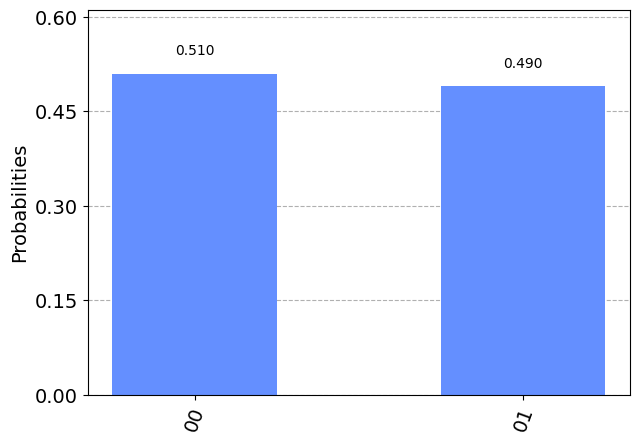

In [4]:
#1f
ckt1.h(q1[0])
ckt1.measure(q1,c1)
simulator = Aer.get_backend('aer_simulator')
job = execute(ckt1, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

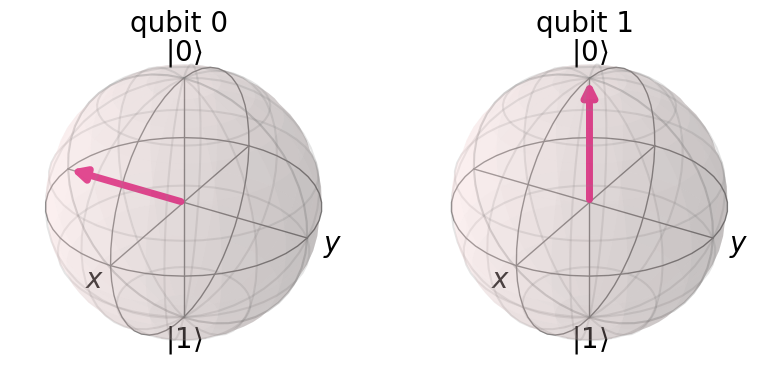

In [15]:
# 1g
q = QuantumRegister(2)
c = ClassicalRegister(2)
ckt10 = QuantumCircuit(q,c)
#ckt10.clear()
ckt10.rx(math.pi/2,q[0])
simulator = Aer.get_backend('statevector_simulator')
job = execute(ckt10, simulator)
result = job.result()
statevector23 = result.get_statevector()
plot_bloch_multivector(statevector23)

In [8]:
#1h
q = QuantumRegister(1)
c = ClassicalRegister(1)
ckt = QuantumCircuit(q,c)
ckt.draw()

q7: 
      
c1: 1/

In [9]:
pi = math.pi
ckt.rx(2*pi/3,q[0])
#ckt.ry(math.acos(math.sqrt(3)/3),q[0])
ckt.draw()

┌──────────┐
  q7: ┤ Rx(2π/3) ├
      └──────────┘
c1: 1/════════════

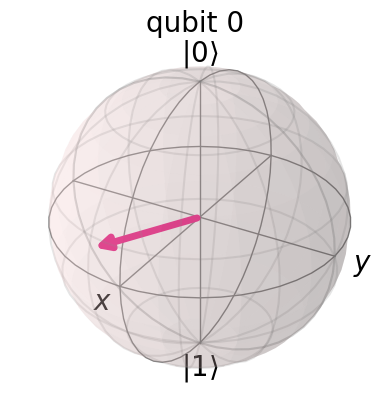

In [10]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(ckt, simulator)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

In [11]:
ckt.measure(q,c)
#circuit.draw()
simulator = Aer.get_backend('qasm_simulator')
job = execute(ckt, simulator, shots = 1000)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 234, '1': 766}


In [12]:
ckt.h(q[0])
ckt.draw()

┌──────────┐┌─┐┌───┐
  q7: ┤ Rx(2π/3) ├┤M├┤ H ├
      └──────────┘└╥┘└───┘
c1: 1/═════════════╩══════
                   0

In [13]:
def x_mesaurement(qc,qubit,cbit):
    qc.h(qubit)
    qc.measure(qubit,cbit)
    return qc

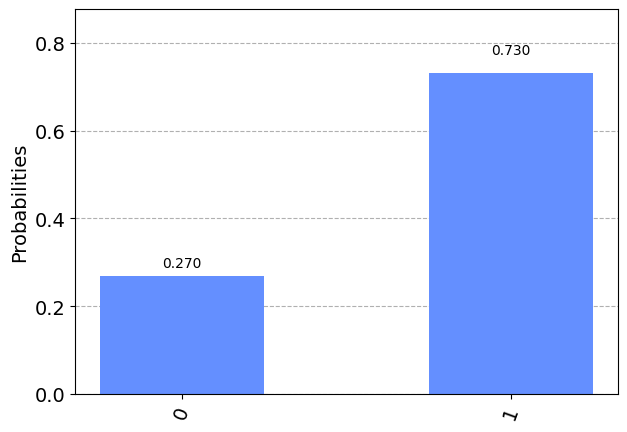

In [14]:
sim = Aer.get_backend('aer_simulator')
x_mesaurement(ckt,0,0)
ans = assemble(ckt)
counts = sim.run(ans).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)

In [16]:
# 2a
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
ckt2 = QuantumCircuit(q2,c2)
ckt2.draw()


q14_0: 
       
q14_1: 
       
 c2: 2/

In [53]:
ckt2.h(0)
ckt2.h(1)
ckt2.draw()

┌───┐
q26_0: ┤ H ├
       ├───┤
q26_1: ┤ H ├
       └───┘
 c8: 2/═════

In [55]:
ckt2.measure(q2,c2)
#circuit.draw()
simulator = Aer.get_backend('qasm_simulator')
job = execute(ckt2, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'01': 244, '11': 255, '00': 257, '10': 268}


In [47]:
#2b
ckt2.clear()
ckt2.h(q2[0])
ckt2.cnot(q2[0],q2[1])
ckt2.draw()

┌───┐     
q14_0: ┤ H ├──■──
       └───┘┌─┴─┐
q14_1: ─────┤ X ├
            └───┘
 c2: 2/══════════

In [48]:
ckt2.measure(q2,c2)
#circuit.draw()
simulator = Aer.get_backend('qasm_simulator')
job = execute(ckt2, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 511, '11': 513}


In [49]:
#2c
ckt2.h(q2[0])
ckt2.h(q2[1])
ckt2.measure(q2,c2)
ckt2.draw()

┌───┐     ┌─┐┌───┐     ┌─┐   
q14_0: ┤ H ├──■──┤M├┤ H ├─────┤M├───
       └───┘┌─┴─┐└╥┘└┬─┬┘┌───┐└╥┘┌─┐
q14_1: ─────┤ X ├─╫──┤M├─┤ H ├─╫─┤M├
            └───┘ ║  └╥┘ └───┘ ║ └╥┘
 c2: 2/═══════════╩═══╩════════╩══╩═
                  0   1        0  1

In [50]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(ckt2, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'01': 247, '00': 266, '10': 259, '11': 252}


In [58]:
#2d(1)
qphi_minus = QuantumCircuit(2)
qphi_minus.x(0)
qphi_minus.h(0)
qphi_minus.cnot(0,1)
svsim = Aer.get_backend('aer_simulator')
qphi_minus.save_statevector()
qobj = assemble(qphi_minus)
final_state = svsim.run(qobj).result().get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [62]:
#2d(2)
qpsi_plus = QuantumCircuit(2)
qpsi_plus.x(1)
qpsi_plus.h(0)
qpsi_plus.cnot(0,1)
svsim = Aer.get_backend('aer_simulator')
qpsi_plus.save_statevector()
qobj2 = assemble(qpsi_plus)
final_state2 = svsim.run(qobj2).result().get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(final_state2, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [67]:
#2d(3)
qpsi_minus = QuantumCircuit(2)
qpsi_minus.x(0)
qpsi_minus.x(1)
qpsi_minus.h(0)
qpsi_minus.cnot(0,1)
svsim = Aer.get_backend('aer_simulator')
qpsi_minus.save_statevector()
qobj3 = assemble(qpsi_minus)
final_state3 = svsim.run(qobj3).result().get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(final_state3, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

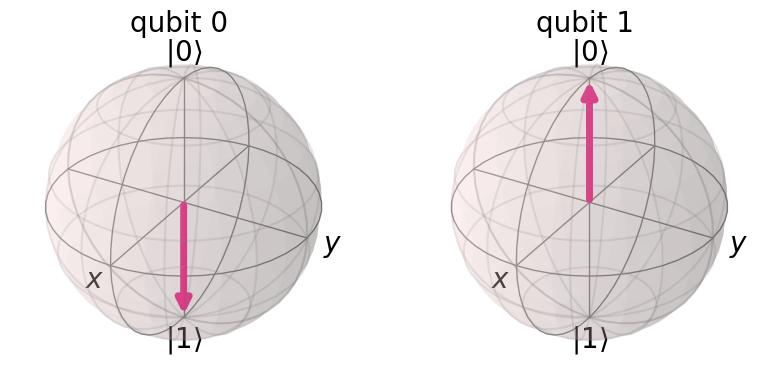

In [73]:
#2e(1)
qq = QuantumRegister(2)
cc = ClassicalRegister(2)
q2e1 = QuantumCircuit(qq,cc)
q2e1.x(qq[1])
q2e1.swap(qq[0],[1])
q2e1.measure(qq,cc)
simulator = Aer.get_backend('statevector_simulator')
job = execute(q2e1, simulator, shots = 1024)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

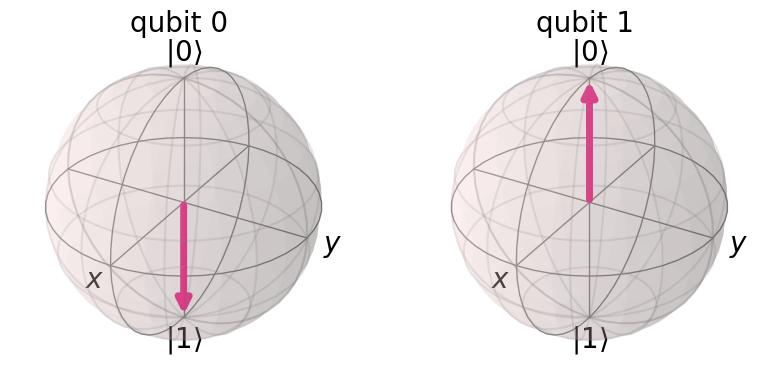

In [75]:
qq = QuantumRegister(2)
cc = ClassicalRegister(2)
q2e1 = QuantumCircuit(qq,cc)
q2e1.x(qq[1])
q2e1.cnot(qq[0],qq[1])
q2e1.cnot(qq[1],qq[0])
q2e1.cnot(qq[0],qq[1])
q2e1.measure(qq,cc)
simulator = Aer.get_backend('statevector_simulator')
job = execute(q2e1, simulator, shots = 1024)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

In [70]:
#3a(1)
psi1 = QuantumCircuit(1)
#cpsi1 = ClassicalRegister(1)
#psi1 = QuantumCircuit(qpsi1,cpsi1)

psi1.h(0)
psi1.x(0)

#psi1.measure(qpsi1,cpsi1)
#psi1.draw()
svsim = Aer.get_backend('aer_simulator')
psi1.save_statevector()
qob = assemble(psi1)
final_state = svsim.run(qob).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")
#simulator = Aer.get_backend('statevector_simulator')
#job = execute(psi1, simulator)
#result = job.result()
#state1 = result.get_statevector()
#array_to_latex(state1, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [71]:
psi1.measure_all()
simulator = Aer.get_backend('qasm_simulator')
job = execute(psi1, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 527, '0': 497}


In [72]:
#3a(2)
psi2 = QuantumCircuit(1)
#cpsi1 = ClassicalRegister(1)
#psi1 = QuantumCircuit(qpsi1,cpsi1)

psi2.h(0)
psi2.y(0)
psi2.z(0)
#psi1.measure(qpsi1,cpsi1)
#psi1.draw()
svsim = Aer.get_backend('aer_simulator')
psi2.save_statevector()
qob2 = assemble(psi2)
final_statee = svsim.run(qob2).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_statee, prefix="\\text{Statevector} = ")
#simulator = Aer.get_backend('statevector_simulator')
#job = execute(psi1, simulator)
#result = job.result()
#state1 = result.get_statevector()
#array_to_latex(state1, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [73]:
psi2.measure_all()
simulator = Aer.get_backend('qasm_simulator')
job = execute(psi2, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 473, '1': 551}


In [62]:
#3b(1)
pi = math.pi
psi1 = QuantumCircuit(1)
#cpsi1 = ClassicalRegister(1)
#psi1 = QuantumCircuit(qpsi1,cpsi1)

psi1.u(pi/3,pi/3,0,0)

#psi1.measure(qpsi1,cpsi1)
#psi1.draw()
svsim = Aer.get_backend('aer_simulator')
psi1.save_statevector()
qob = assemble(psi1)
final_state = svsim.run(qob).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [63]:
psi1.measure_all()
simulator = Aer.get_backend('qasm_simulator')
job = execute(psi1, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 247, '0': 777}


In [64]:
#3b(2)
pi = math.pi
psi2 = QuantumCircuit(1)
#cpsi1 = ClassicalRegister(1)
#psi1 = QuantumCircuit(qpsi1,cpsi1)

psi2.u(pi/3,pi/2,0,0)

#psi1.measure(qpsi1,cpsi1)
#psi1.draw()
svsim = Aer.get_backend('aer_simulator')
psi2.save_statevector()
qob2 = assemble(psi2)
final_state = svsim.run(qob2).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [65]:
psi2.measure_all()
simulator = Aer.get_backend('qasm_simulator')
job = execute(psi2, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 284, '0': 740}


In [112]:
#3c(1)
psi1 = QuantumCircuit(1)
psi1.clear()
psi1.x(0)
psi1.h(0)


svsim = Aer.get_backend('aer_simulator')
psi1.save_statevector()
qob = assemble(psi1)
final_state = svsim.run(qob).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")


<IPython.core.display.Latex object>

In [113]:
psi1.measure_all()
simulator = Aer.get_backend('qasm_simulator')
job = execute(psi1, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 520, '1': 504}


In [108]:
#3c(2)
psi2 = QuantumCircuit(1)

#psi1.x(0)
psi2.h(0)


svsim = Aer.get_backend('aer_simulator')
psi2.save_statevector()
qob = assemble(psi2)
final_state = svsim.run(qob).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [109]:
psi2.measure_all()
simulator = Aer.get_backend('qasm_simulator')
job = execute(psi2, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 516, '1': 508}


In [96]:
#4(1)
sqrt = math.sqrt
q4 = QuantumRegister(3)
c4 = ClassicalRegister(1)
ckt4 = QuantumCircuit(q4,c4)
ckt4.h(q4[2])
ckt4.cswap(q4[2],q4[1],q4[0])
ckt4.h(q4[2])
ckt4.x(q4[2])
ckt4.measure(q4[2],c4)
ckt4.draw()

q932_0: ──────X──────────────
              │              
q932_1: ──────X──────────────
        ┌───┐ │ ┌───┐┌───┐┌─┐
q932_2: ┤ H ├─■─┤ H ├┤ X ├┤M├
        └───┘   └───┘└───┘└╥┘
 c28: 1/═══════════════════╩═
                           0

In [97]:
simulator = Aer.get_backend('aer_simulator')
job = execute(ckt4, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 1024}


In [28]:
#4(2)
sqrt = math.sqrt
q4 = QuantumRegister(3)
c4 = ClassicalRegister(1)
ckt4 = QuantumCircuit(q4,c4)
#ckt4.h(q4[0])
ckt4.x(q4[1])
#ckt4.h(q4[1])
ckt4.h(q4[2])
ckt4.cswap(q4[2],q4[1],q4[0])
ckt4.h(q4[2])
ckt4.x(q4[2])
ckt4.measure(q4[2],c4)
ckt4.draw()

q125_0: ──────X──────────────
        ┌───┐ │              
q125_1: ┤ X ├─X──────────────
        ├───┤ │ ┌───┐┌───┐┌─┐
q125_2: ┤ H ├─■─┤ H ├┤ X ├┤M├
        └───┘   └───┘└───┘└╥┘
 c17: 1/═══════════════════╩═
                           0

In [29]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(ckt4, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 503, '1': 521}


In [100]:
#4(3)
sqrt = math.sqrt
q4 = QuantumRegister(3)
c4 = ClassicalRegister(1)
ckt4 = QuantumCircuit(q4,c4)
#ckt4.h(q4[0])
#ckt4.h(q4[1])
ckt4.h(q4[2])
ckt4.cswap(q4[2],q4[1],q4[0])
ckt4.h(q4[2])
ckt4.x(q4[2])
ckt4.measure(q4[2],c4)
ckt4.draw()

q961_0: ──────X──────────────
              │              
q961_1: ──────X──────────────
        ┌───┐ │ ┌───┐┌───┐┌─┐
q961_2: ┤ H ├─■─┤ H ├┤ X ├┤M├
        └───┘   └───┘└───┘└╥┘
 c30: 1/═══════════════════╩═
                           0

In [101]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(ckt4, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 1024}


In [104]:
#4(4)
sqrt = math.sqrt
q4 = QuantumRegister(3)
c4 = ClassicalRegister(1)
ckt4 = QuantumCircuit(q4,c4)
#ckt4.h(q4[0])
ckt4.u(pi/30,pi/4,0,q4[0])
ckt4.u(pi/3,pi/4,pi/3,q4[1])
ckt4.h(q4[2])
ckt4.cswap(q4[2],q4[1],q4[0])
ckt4.h(q4[2])
ckt4.x(q4[2])
ckt4.measure(q4[2],c4)
ckt4.draw()

┌───────────────┐                 
q990_0: ┤ U(π/30,π/4,0) ├──X──────────────
        ├───────────────┴┐ │              
q990_1: ┤ U(π/3,π/4,π/3) ├─X──────────────
        └─────┬───┬──────┘ │ ┌───┐┌───┐┌─┐
q990_2: ──────┤ H ├────────■─┤ H ├┤ X ├┤M├
              └───┘          └───┘└───┘└╥┘
 c32: 1/════════════════════════════════╩═
                                        0

In [105]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(ckt4, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 100, '1': 924}


In [84]:
#5(a)
q5 = QuantumRegister(1)
c5 = ClassicalRegister(1)
ckt5 = QuantumCircuit(q5,c5)
ckt5.h(q5[0])
ckt5.measure(q5,c5)
simulator = Aer.get_backend('qasm_simulator')
def QRNG(n):
    ans = ''
    for i in range(n):
        job = execute(ckt5, simulator, shots = 1)
        result = job.result()
        counts = result.get_counts()
        for key,value in counts.items():
            temp = key
            ans+=str(key)
    return ans
bit_length = int(input())
for i in range(10):
    ans = QRNG(bit_length)
    print(int(ans,2))
    print('\n')

4
5


4


13


0


6


11


3


12


9


1




In [80]:
#5(b)
apitoken = "4d2e433b131fc69100f58b12026f70d5975c8830a0e0ed238a6d1bc20b77b255edc514e0ead4b4aa8c1ce1bd83791562ed345aa644f90c6c43e1b07de949b2a6"
IBMQ.save_account(apitoken,overwrite=True)

In [83]:
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q',group='open',project='main')
qcomp = provider.get_backend('ibmq_lima') 
q5 = QuantumRegister(1)
c5 = ClassicalRegister(1)
ckt5 = QuantumCircuit(q5,c5)
ckt5.h(q5[0])
ckt5.measure(q5,c5)
simulator = Aer.get_backend('qasm_simulator')
def QRNG_real(n):
    ans = ''
    for i in range(n):
        job = execute(ckt5, backend=qcomp, shots = 1)
        job_monitor(job)
        result = job.result()
        counts = result.get_counts()
        for key,value in counts.items():
            temp = key
            ans+=str(key)
    return ans
bit_length = int(input())
for i in range(10):
    ans = QRNG_real(bit_length)
    print(int(ans,2))
    print('\n')

ibmqfactory.load_account:WARNING:2022-09-21 18:41:55,827: Credentials are already in use. The existing account in the session will be replaced.


3


KeyboardInterrupt: 